## **🎯Solution: Using Gemini LLM models to analyze process video recordings and generate documentation**

Employees value documentation, but rarely enjoy creating it. Dedicated software is often expensive and time-consuming, which discourages managers from maintaining up-to-date records. **Gemini LLM models** address this issue by enabling easy and efficient documentation generation. 

The entire documentation process can be based on a simple **show-and-tell video recording**, making the approach user-friendly and time-saving.

### **_How it Works_: Simplified Process Documentation with Gemini AI**

The entire documentation creation process can be streamlined into just three simple steps using Gemini AI models.

1. **📹 Record**: A Subject Matter Expert (SME) or employee creates a narrated process recording (show-and-tell video).
2. **🧠 Analyse**: The Gemini model analyzes the recording from multiple perspectives.
   - Optionally: The AI can prepare a list of questions for the SME to clarify the process further. Using agentic solutions, these questions can be sent directly to the SME.
   - Additional clarifications can also be provided through video recordings, eliminating the need for lengthy explanations or tedious screenshot captures.
3. **Build Documentation**: The AI prepares the documentation according to predefined standards.

### **Key Advantages**

This approach saves significant time and effort for all parties involved:

- 📹 **No Complex Software**: SMEs only need a simple video recorder—no additional installations required.
- 🧑‍💻 **No Special Training**: SMEs don’t need to follow strict rules or undergo software training while recording.
- 🤝 **Fewer Meetings**: AI autonomously clarifies ambiguities, reducing the need for repeated SME-BA meetings.
- 🗂️ **Standardized Documentation**: Documentation is generated in a consistent format, making it easier to compare and analyze processes.

By simplifying and automating the documentation process, companies can address previously mentioned issues and achieve:

- 💰 **Significant Cost Reductions**: The process can be condensed into a video chat with the AI.
- 📈 **Higher Adoption Rates**: Managers and employees are more willing to document processes due to the low time investment and substantial benefits.
- 🔧 **Improved Process Management**: Documentation becomes a foundation for building agentic solutions, optimizing existing processes, or modernizing software within the organization.

# 🔍 **Solving the Process Documentation Problem with Gemini AI**
### Using Gemini for Process Discover and Process Mining

# ⚠️ The Problem of Inadequate Process Documentation 

**Check the corresponding video -> https://youtu.be/z1j2cn2_OdI**

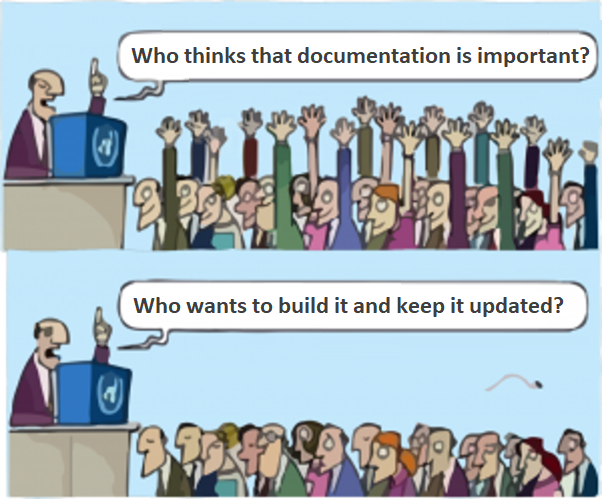

### **Problem Description**

Despite many attempts, process mapping and process mining, especially at a low level, remain a significant challenge for many companies. Often, these efforts require installing complex software, adhering to strict standards, and following specific guidelines. The effort required to map processes frequently does not pay off, leading to small and medium-sized processes being undocumented, while the documentation for critical processes is not updated as frequently as it should be. 

This lack of proper documentation causes various challenges, including:

- 🔄 **Operational Inefficiency**: Inconsistent execution as employees perform tasks differently, resulting in outcome variations.
- ⏳ **Time Wastage**: Employees spend time figuring out steps instead of focusing on productivity.
- 📋 **Non-compliance**: Missing or incomplete documentation can lead to failures in adhering to legal or industry standards.
- ✅❌ **Quality Inconsistency**: Without standardized processes, maintaining consistent quality across products or services is challenging.
- ⚠️ **Higher Error Rates**: Errors increase when employees rely on memory or assumptions instead of clear guidance.
- 🔀 **Limited Improvement Opportunities**: Unclear processes make identifying and implementing improvements difficult.

The list goes on, underscoring that the lack of proper process documentation is a critical problem for many companies globally.

## **🔧 What do companies currently use to avoid these issues?**

To address the issues caused by poorly documented processes, companies often use advanced tools and methodologies like process mining, process discovery, and task mining software. Tools such as **Celonis**, **ABBYY Timeline**, or **Signavio** help organizations analyze, document, and optimize their workflows. 

However, implementing these tools is often time-consuming, costly, and yields results that frequently fall short of expectations. This approach is particularly unsuitable for small-scale processes, where the investment of time and money is unlikely to be justified.

## **🤖💪 Why only Gemini can do this?**

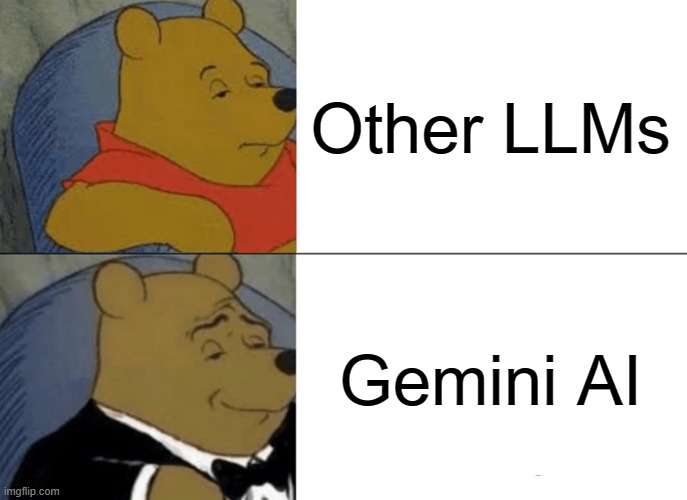

- 🌐 **Multimodality**: Gemini is the only State-of-the-Art (SotA) model with full multimodality.  
  It can analyze process recordings and generate accurate documentation based on them, as demonstrated in the provided examples.

- 🧠 **2 Million Tokens Context Window**: Gemini is uniquely capable of handling long process recordings, which are often extensive.  
  - For example, a half-hour process recording contains over 500k tokens (e.g., `"E2E Process - Full.mp4"`, presenting a customer service process end-to-end).  
  - Gemini’s large context window ensures the entire recording is analyzed effectively.

- 💰 **Cost Efficiency**: Using **Gemini Flash**, organizations can analyze 14 hours of process recordings for just **$1**.  
  - This allows multiple employees' recordings to be analyzed.  
  - Insights can be aggregated across diverse inputs. *(Note: This multi-input approach is not presented in this notebook.)*

- ⚡ **Context Caching**: Gemini’s context caching not only saves costs but also accelerates processing for longer videos.  
  - Process recordings can be repurposed as **training materials**, enabling quick queries about processes during onboarding.

- 📤 **File Upload Support**: Gemini enables easy file uploads for document processing.  
  - Users can upload various types of files, including video recordings and documents. This approach allows for faster processing times, as large video files do not need to be uploaded each time someone wants to process them.

---

**By leveraging Gemini, organizations can revolutionize process documentation, reduce costs, and achieve consistent improvements while keeping initial effort low.**

# 💡 Solution

## ⚙️Configuration

Loading necessary libraries and Google AI API Key

In [5]:
# Importing Libraries and Google AI API Key

!pip install docx
!pip install --upgrade python-docx

import google
import google.generativeai as genai
from google.generativeai import caching
import pathlib
import os
import time
import datetime
import re
import json

import pandas as pd
import matplotlib.pyplot as plt

# Get Gemini API Key
#from kaggle_secrets import UserSecretsClient
#user_secrets = UserSecretsClient()
#GEMINI_API_KEY = user_secrets.get_secret("GEMINI_API_KEY")

#genai.configure(api_key=GEMINI_API_KEY)

####
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
GEMINI_API_KEY = user_secrets.get_secret("canspirit-gcp-project1")

genai.configure(api_key=GEMINI_API_KEY)


# Functions for managing the video files upload

def upload_to_gemini(path, mime_type=None):
  file = genai.upload_file(path, mime_type=mime_type)
  print(f"Uploaded file '{file.display_name}' as: {file.uri} as the file ID as: {file.name.split('/')[1]} the file will expire on: {file.expiration_time}")
  return file

def wait_for_files_active(files):
  print("Waiting for file processing...")
  for name in (file.name for file in files):
    file = genai.get_file(name)
    while file.state.name == "PROCESSING":
      print(".", end="", flush=True)
      time.sleep(10)
      file = genai.get_file(name)
    if file.state.name != "ACTIVE":
      raise Exception(f"File {file.name} failed to process")
  print("...all files ready")

def checkIfFileIsUploaded(filesNames):
    files = []
    for fileName in filesNames:
        print(f"Checking if the file: {fileName} is uploaded")
        file = genai.get_file(fileName)
        if file.state.name != "ACTIVE":
          raise Exception(f"File {fileName} is not uploaded")
        files.append(file)
        print(f"{fileName} is ready and stored under name: {file.display_name}")
        print(f" File will expite at: {file.expiration_time}")
    return files

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docx: filename=docx-0.2.4-py3-none-any.whl size=53892 sha256=fe541c6d9757a15bb1570782332e662113b64ddca54ddc018f276b2255cf2405
  Stored in directory: /root/.cache/pip/wheels/81/f5/1d/e09ba2c1907a43a4146d1189ae4733ca1a3bfe27ee39507767
Successfully built docx
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 4.8 MB/s eta 0:00:00a 0:00:01


## **📂File Upload: Streamlining Document Processing with Gemini API**

The Gemini API offers powerful document processing capabilities, allowing users to easily upload and analyze various file types, including PDFs, text, HTML, and more. Here are the key advantages and uses:

- 📂 **Versatile File Upload**: Users can upload files like PDFs, text documents, and other formats supported by the Gemini API. This makes it easy to process a wide range of documents, including complex reports or user manuals.
  
- ⏱️ **Faster Processing**: By uploading documents through the File API, large files (up to 2GB per file) can be processed more efficiently. The document is stored temporarily for up to 48 hours, eliminating the need for repeated uploads every time you want to process it.

- 🔍 **Advanced Document Analysis**: Once uploaded, Gemini can summarize, describe, and extrapolate insights from the document content. You can also query the document directly by providing text prompts, enabling a detailed understanding of the content.

- 🗄️ **Easy Retrieval & Management**: The API allows you to list, retrieve, and delete uploaded files, making document management seamless. With the File API, you can manage and query your documents as needed, all from one centralized platform.

This functionality helps streamline workflows, particularly when dealing with multiple large files, by ensuring that you don’t need to re-upload documents for every query or processing request.
ng request.


In [6]:
# Uploading big video files using Gemini Using files API

#files = [
  #upload_to_gemini("/kaggle/input/rpa-credit-bank-business-process-videos/E2E Process - Offer Acceptation.mp4", mime_type="video/mp4")
#   upload_to_gemini("/kaggle/input/processvideo2mins/ProcessVideo2mins.mp4", mime_type="video/mp4")

#]


# Some files have a processing delay. Wait for them to be ready.
#wait_for_files_active(files)

# Check if the video file is uploaded
uploadedFiles = ["ipiowiwrq0mr"]

files = checkIfFileIsUploaded(uploadedFiles)

print(f"Number of files uploaded: {len(files)}" )

Checking if the file: ipiowiwrq0mr is uploaded
ipiowiwrq0mr is ready and stored under name: ProcessVideo2mins.mp4
 File will expite at: 2025-01-17 08:16:43.754215+00:00
Number of files uploaded: 1


## **🤖🎯Processing Video to Generate Business Process Documentation**

The goal is to leverage AI to process a video that demonstrates a business process. The AI's primary role is to function as a **Business Analyst**, creating a **Process Definition Document (PDD)**. The AI helps automate the process documentation, reducing the effort needed to manually define, standardize, and update process documentation, ensuring accuracy and consistency across the organization.

### **Generate Process Definition Documentation from SME Process Recordings**

The AI leverages process recordings provided by Subject Matter Experts (SMEs) to automatically generate a **Process Definition Document (PDD)**. By analyzing these recordings, the AI extracts key details about the business process, such as tasks, decision points, and workflows, and organizes them into a structured, standardized format.

This approach eliminates the need for manual documentation, saving time and reducing errors. SMEs simply record the process, and the AI transforms it into a comprehensive, accurate PDD that reflects the process's full scope. This automated process documentation can then be used for process optimization, training, or system updates, providing significant efficiency gains for the organizati.


In [9]:
# System Instuction for generating the process documentation

generate_docs_systemPrompt = """You are a Business Analyst tasked with reviewing a process recording from the Subject Matter Expert (SME) in the form of a video. Your objective is to carefully analyze the video and extract a detailed, step-by-step outline of the process presented. The video may not cover the process end-to-end, so you need to assess both the explicit steps presented and any references the SME makes to previous steps.

Your outline should be clear, precise, and suitable for inclusion in formal documentation, such as a Process Definition Document (PDD). Ensure that each step is detailed, any business exceptions are noted, and the process is presented in the order it is executed. Pay attention to the narrator’s comments to identify any transitions or additional information.

The structure of the output documentation should include the following sections:

1. Process Name
   Provide the name of the process being described.

2. Short Process Description
   Offer a brief summary of the process.

3. List of Applications Utilized
   This should be a table that includes the following details for each application used in the process:
   - The name of the application
   - The type of the application (e.g., web application, desktop application)
   - The URL of the application, if applicable
   Ensure both web and desktop applications are identified.

4. List of Steps
   - Provide a detailed, step-by-step description of the process in the order the steps are executed.
   - Steps should be listed as they were presented in the video.
   - Each interaction with the user interface (UI) must be documented.
   - Document each described or presented data transformation.
   - Use the following numbering format:
     - Example:
       1.0 Group of steps
       1.1 First step in the group
       1.2 Second step in the group
   - Steps should specify the UI element the user interacts with or the calculation logic described.
   - First step the group should specify the application name that the user interact with.

5. Exception Handling
   Describe any exceptions in the process and how they should be handled.

6. Requires Clarification
   List any questions you have for the SME or aspects of the process that require further clarification.

Provide the output in the following JSON format:

{
  "process_name": "[The name of the process based on the video content]",
  "short_process_description": "[The short process description based on the video content]",
  "list_of_applications": [
    {
      "application_name": "[Name of the application]",
      "type": "[Type of the application, e.g., web/desktop]",
      "url": "[URL of the application, if applicable]"
    },
    {
      "application_name": "[Name of the application]",
      "type": "[Type of the application, e.g., web/desktop]",
      "url": "[URL of the application, if applicable]"
    }
  ],
  "list_of_steps": [
    {
      "group_name": "[Description of the group of steps]",
      "numbering": "1.0",
      "time_stamp": "[Timestamp from the video when this step is executed]",
      "sub_steps": [
        {
          "step": "[Description of the sub-step]",
          "numbering": "1.1",
          "time_stamp": "[Timestamp from the video when this step is executed]"
        },
        {
          "step": "[Description of the sub-step]",
          "numbering": "1.2",
          "time_stamp": "[Timestamp from the video when this step is executed]"
        }
      ]
    }
  ],
  "exceptions": [
    {
        "exception": "[Exception name]",
        "description": "[Exception description]"
    },
    {
        "exception": "[Exception name]",
        "description": "[Exception description]"
    },
    {
        "exception": "[Exception name]",
        "description": "[Exception description]"
    }
  ],
  "clarifications": [
    "[Required clarification or question]",
    "[Required clarification or question]",
    "[Required clarification or question]"
  ]
}
"""

In [10]:
# Construct a generative model query to generate Process Documentation

generation_config = {
  "temperature": 1,
  "top_p": 0.95,
  "top_k": 40,
  "max_output_tokens": 8192,
  "response_mime_type": "text/plain",
}

model = genai.GenerativeModel(
    model_name="gemini-1.5-flash",
    generation_config=generation_config,
    system_instruction=generate_docs_systemPrompt)

chat_session = model.start_chat(
  history=[
    {
      "role": "user",
      "parts": [
        files[0],
      ],
    },
  ]
)

# Query the model
response = chat_session.send_message("Process the attached video.")

# Displaying the response to the user
processDocumentationGeneratedByAI = response.text
print(processDocumentationGeneratedByAI)

# Monitor the usage
print(response.usage_metadata)

```json
{
  "process_name": "Credit Offer Acceptance and Required Documents Communication",
  "short_process_description": "This process outlines the steps taken after a customer accepts a credit offer. It involves verifying the acceptance in the RPA Bank Credit Application, identifying required documents using the Product ID, and communicating this information to the customer via email.",
  "list_of_applications": [
    {
      "application_name": "Email Client",
      "type": "desktop application",
      "url": "Not applicable"
    },
    {
      "application_name": "RPA Bank Credit Application",
      "type": "web application",
      "url": "https://creditapp-poc.web.app/#commands"
    },
    {
      "application_name": "Credit Management System",
      "type": "web application",
      "url": "Not available in video"
    },
    {
      "application_name": "Notepad",
      "type": "desktop application",
      "url": "Not applicable"
    }
  ],
  "list_of_steps": [
    {
      "group_

In [11]:
from docx import Document
from docx.shared import Pt, RGBColor, Inches
from docx.enum.text import WD_ALIGN_PARAGRAPH
from docx.oxml.ns import qn
from docx.oxml import OxmlElement

# Regex pattern to match JSON enclosed in { } brackets
pattern = r"\{.*\}"

# Extracting the JSON part
json_match = re.search(pattern, processDocumentationGeneratedByAI, re.DOTALL)

if json_match:
    json_str = json_match.group(0)
    try:
        # Parsing JSON to ensure it's valid
        json_data = json.loads(json_str)
    except json.JSONDecodeError as e:
        print("Error decoding JSON:", e)
else:
    print("No JSON found in the text.")

def set_table_borders(table, border_color="auto"):
    for row in table.rows:
        for cell in row.cells:
            tc = cell._element
            tcPr = tc.get_or_add_tcPr()
            tcBorders = OxmlElement('w:tcBorders')

            # Set border styles
            for border in ['top', 'left', 'bottom', 'right', 'insideH', 'insideV']:
                border_elem = OxmlElement(f'w:{border}')
                border_elem.set(qn('w:val'), 'single')
                border_elem.set(qn('w:sz'), '4')  # Border size
                border_elem.set(qn('w:space'), '0')
                if border_color != "auto":
                    border_elem.set(qn('w:color'), border_color)
                tcBorders.append(border_elem)

            tcPr.append(tcBorders)

# Create a new Document
doc = Document()

# Set default font to Calibri
doc.styles['Normal'].font.name = 'Calibri'
doc.styles['Heading 1'].font.name = 'Calibri'
doc.styles['Heading 2'].font.name = 'Calibri'
doc.styles['Heading 3'].font.name = 'Calibri'

# Set heading color to blue
for style in doc.styles:
    if 'Heading' in style.name:
        style.font.color.rgb = RGBColor(54, 95, 145)

# Add a title
doc.add_heading('Process Name: ' + json_data["process_name"], level=1)

# Add a short description
doc.add_paragraph(json_data["short_process_description"])

# Add a heading for the list of applications
doc.add_heading('List of applications', level=2)

# Add the list of applications
table = doc.add_table(rows=1, cols=3)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Application Name'
hdr_cells[1].text = 'Type'
hdr_cells[2].text = 'URL'

hdr_cells[0].paragraphs[0].runs[0].bold = True
hdr_cells[1].paragraphs[0].runs[0].bold = True
hdr_cells[2].paragraphs[0].runs[0].bold = True

for app in json_data["list_of_applications"]:
    row_cells = table.add_row().cells
    row_cells[0].text = app['application_name']
    row_cells[1].text = app['type']
    row_cells[2].text = app['url'] if app['url'] is not None else ''

# Add a heading for the list of steps
doc.add_heading('List of steps', level=2)

# Add the list of steps
for step_group in json_data["list_of_steps"]:
    # Add group name as a merged cell
    table = doc.add_table(rows=1, cols=3)
    table.autofit = False  # Disable auto-fitting for the table

    # Set column widths
    col_widths = [Inches(0.5), Inches(4.5), Inches(1.5)]  # Adjust the widths as needed
    
    for i, width in enumerate(col_widths):
        table.columns[i].width = width
    hdr_cells = table.rows[0].cells
    hdr_cell = hdr_cells[0].merge(hdr_cells[2])
    hdr_cell.paragraphs[0].add_run(f"{step_group['numbering']} {step_group['group_name']}").bold = True
    hdr_cell.paragraphs[0].alignment = WD_ALIGN_PARAGRAPH.LEFT
    hdr_cell.vertical_alignment = WD_ALIGN_PARAGRAPH.CENTER  # Center vertically
    shading_elm = OxmlElement('w:shd')
    shading_elm.set(qn('w:fill'), 'D1E2F8')  # Light blue color
    hdr_cell._element.tcPr.append(shading_elm)

    # Add sub-steps
    for sub_step in step_group["sub_steps"]:
        row_cells = table.add_row().cells
        row_cells[0].text = sub_step['numbering']
        row_cells[1].text = sub_step['step']
        row_cells[2].text = sub_step['time_stamp']

    set_table_borders(table)

# Add a heading for exception handling
doc.add_heading('Exceptions', level=2)

# Add exception handling details
for exception in json_data["exceptions"]:
    doc.add_paragraph(f"Exception: {exception['exception']}", style='List Bullet')
    doc.add_paragraph(f"Description: {exception['description']}")

# Add a heading for clarifications
doc.add_heading('Requires Clarification', level=2)

# Add clarifications
for clarification in json_data["clarifications"]:
    doc.add_paragraph(clarification, style='List Bullet')

# Save the document
doc.save(f"{json_data['process_name'].replace(' ', '_')}.docx")

print(f"Process documentation generated successfully! Check the document: {json_data['process_name'].replace(' ', '_')}.docx")

Process documentation generated successfully! Check the document: Credit_Offer_Acceptance_and_Required_Documents_Communication.docx


---
### When the Process Definition Document file is ready it can be downloaded from the output folder on the right.
---

## 📈📊 Generate a Draw.io (Diagrams.net) Chart to Visualize the Process Flow ##

This section of the code/script is designed to **generate a visual diagram** using Draw.io, a powerful tool for creating flowcharts or architecture diagrams.  

The generated chart provides an **easy-to-understand visual summary** of key processes, making it an essential tool for planning, development, or analysis tasks.

In [12]:
# Generate a Draw.io System prompt

systemPrompt_ChatGeneration="""Generate the MX file code that can be directly imported into Draw.io to create a process map. The MX should define a workflow process map according the <List_of_Steps/> in the user's message, including shapes (e.g., rectangles for actions, diamonds for decisions), connectors, and labels. Make sure that the MX file generated by you is correct and can be copied to the Draw.IO application without errors.

Follow the rules below: 
<RULES>
Start and End nodes: Represent the beginning and end of the process.
Reflect on the chart all the steps listed in the 'List_of_Steps' section.
Do not mearge steps from the list of steps to the one block (mxCell) in the MX file. 
Do not group steps under each other.
The order of steps on the chart should be from left to right.
There are no space limitations. Order blocks horizontally.
Action nodes: Use rectangles to represent tasks or actions in the process.
Decision nodes: Use diamonds to represent decision points with 'Yes' and 'No' branches.
Group of steps are logically connected thus all steps needs to be in one line and not grouped.
<IMPORTANT> The text inside value tag must not contain double quotes "" use singel quotes instead. '' ex: value=" Product name is: 'Name of the Product'" or value="Click 'Submit' button"! <IMPORTANT/>
Each action listed on the 'List of Steps' needs to be a separate step (block)
Connectors: Connect shapes to define the flow from one step to the next.
Labels: Add labels to each shape to describe its role (e.g., 'Start', 'Decision: Is data valid?', 'End').
Do not use double quates in the value for the MX elements.
Do not use double quates inside the value tag. Use Single quates instead.
The flow of the chart should be fromleft to right.
The diagram should not have any bended lines.
Generate the MX file till all the steps are reflected and the file has closuing clause of "</diagram></mxfile>"
Start ad End nodes should be a circle (not elipses). 
The list of steps should be as detailed as possible.
Make sure taht steps are propery connected.
Make sure that all the items are properly alligend.
Remember to add any rules or decision points using dimonds.
Remember to split each point into the separate box.
</RULES>

<IMPORTAINT>
Be detailed and do not miss any steps in the <List_of_Steps/>.  The content will be copied and pasted to the blank Draw.IO project. Make sure that the XLM is correcly structed and will work. Please find the exmaple of the correct Draw IO format below. Do not define 'etag'.

<CRITICAL> The text inside value tag must not contain double quotes "" use singel quotes instead. '' ex: value=" Product name is: 'Name of the Product'" or value="Click 'Submit' button"! <IMPORTANT/>
</CRITICAL>

<MX FILE EXAMPLE>

<mxfile host="Electron" modified="2024-11-11T23:25:00.048Z" agent="5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) draw.io/20.2.3 Chrome/102.0.5005.167 Electron/19.0.11 Safari/537.36" etag="SEY0rUoS_tAO2XkjiwVg" compressed="false" version="20.2.3" type="device">
  <diagram id="Yt7LL3NTDxsKtHlv3eUc" name="[Process Name]">
    <mxGraphModel dx="3000" dy="3000" grid="1" gridSize="10" guides="1" tooltips="1" connect="1" arrows="1" fold="1" page="1" pageScale="1" pageWidth="3000" pageHeight="3000" math="0" shadow="0">
      <root>
        <mxCell id="0" />
        <mxCell id="1" parent="0" />
        <mxCell id="Cmv73IDUztHTh19W1OSw-33" value="" style="edgeStyle=orthogonalEdgeStyle;rounded=0;orthogonalLoop=1;jettySize=auto;html=1;" parent="1" target="Cmv73IDUztHTh19W1OSw-36" edge="1">
          <mxGeometry relative="1" as="geometry" />
        </mxCell>
        <mxCell id="Cmv73IDUztHTh19W1OSw-65" style="edgeStyle=orthogonalEdgeStyle;rounded=0;orthogonalLoop=1;jettySize=auto;html=1;entryX=0;entryY=0.5;entryDx=0;entryDy=0;" parent="1" source="Cmv73IDUztHTh19W1OSw-34" target="Cmv73IDUztHTh19W1OSw-36" edge="1">
          <mxGeometry relative="1" as="geometry" />
        </mxCell>
        <mxCell id="Cmv73IDUztHTh19W1OSw-34" value="Start" style="ellipse;whiteSpace=wrap;html=1;" parent="1" vertex="1">
          <mxGeometry x="340" y="860" width="60" height="60" as="geometry" />
        </mxCell>
        <mxCell id="Cmv73IDUztHTh19W1OSw-35" value="" style="edgeStyle=orthogonalEdgeStyle;rounded=0;orthogonalLoop=1;jettySize=auto;html=1;" parent="1" source="Cmv73IDUztHTh19W1OSw-36" target="Cmv73IDUztHTh19W1OSw-38" edge="1">
          <mxGeometry relative="1" as="geometry" />
        </mxCell>
        <mxCell id="Cmv73IDUztHTh19W1OSw-36" value="Detailed step one" style="rounded=0;whiteSpace=wrap;html=1;" parent="1" vertex="1">
          <mxGeometry x="440" y="860" width="120" height="60" as="geometry" />
        </mxCell>
        <mxCell id="Cmv73IDUztHTh19W1OSw-37" value="" style="edgeStyle=orthogonalEdgeStyle;rounded=0;orthogonalLoop=1;jettySize=auto;html=1;" parent="1" source="Cmv73IDUztHTh19W1OSw-38" target="Cmv73IDUztHTh19W1OSw-40" edge="1">
          <mxGeometry relative="1" as="geometry" />
        </mxCell>
        <mxCell id="Cmv73IDUztHTh19W1OSw-38" value="Detailed step two" style="rounded=0;whiteSpace=wrap;html=1;" parent="1" vertex="1">
          <mxGeometry x="600" y="860" width="120" height="60" as="geometry" />
        </mxCell>
        <mxCell id="Cmv73IDUztHTh19W1OSw-39" value="" style="edgeStyle=orthogonalEdgeStyle;rounded=0;orthogonalLoop=1;jettySize=auto;html=1;" parent="1" source="Cmv73IDUztHTh19W1OSw-40" target="Cmv73IDUztHTh19W1OSw-44" edge="1">
          <mxGeometry relative="1" as="geometry" />
        </mxCell>
        <mxCell id="Cmv73IDUztHTh19W1OSw-40" value="Detailed step &#39;three&#39;" style="rounded=0;whiteSpace=wrap;html=1;" parent="1" vertex="1">
          <mxGeometry x="760" y="860" width="120" height="60" as="geometry" />
        </mxCell>
        <mxCell id="Cmv73IDUztHTh19W1OSw-41" value="Yes" style="edgeStyle=orthogonalEdgeStyle;rounded=0;orthogonalLoop=1;jettySize=auto;html=1;" parent="1" source="Cmv73IDUztHTh19W1OSw-44" target="Cmv73IDUztHTh19W1OSw-46" edge="1">
          <mxGeometry relative="1" as="geometry" />
        </mxCell>
        <mxCell id="Cmv73IDUztHTh19W1OSw-42" style="edgeStyle=orthogonalEdgeStyle;rounded=0;orthogonalLoop=1;jettySize=auto;html=1;entryX=0;entryY=0.5;entryDx=0;entryDy=0;" parent="1" source="Cmv73IDUztHTh19W1OSw-44" target="Cmv73IDUztHTh19W1OSw-48" edge="1">
          <mxGeometry relative="1" as="geometry">
            <Array as="points">
              <mxPoint x="960" y="980" />
            </Array>
          </mxGeometry>
        </mxCell>
        <mxCell id="Cmv73IDUztHTh19W1OSw-43" value="No" style="edgeLabel;html=1;align=center;verticalAlign=middle;resizable=0;points=[];" parent="Cmv73IDUztHTh19W1OSw-42" vertex="1" connectable="0">
          <mxGeometry x="0.1738" relative="1" as="geometry">
            <mxPoint as="offset" />
          </mxGeometry>
        </mxCell>
        <mxCell id="Cmv73IDUztHTh19W1OSw-44" value="Condition" style="rhombus;whiteSpace=wrap;html=1;rounded=0;" parent="1" vertex="1">
          <mxGeometry x="920" y="850" width="80" height="80" as="geometry" />
        </mxCell>
        <mxCell id="Cmv73IDUztHTh19W1OSw-45" value="" style="edgeStyle=orthogonalEdgeStyle;rounded=0;orthogonalLoop=1;jettySize=auto;html=1;" parent="1" source="Cmv73IDUztHTh19W1OSw-46" target="Cmv73IDUztHTh19W1OSw-50" edge="1">
          <mxGeometry relative="1" as="geometry" />
        </mxCell>
        <mxCell id="Cmv73IDUztHTh19W1OSw-46" value="Decision A" style="rounded=0;whiteSpace=wrap;html=1;" parent="1" vertex="1">
          <mxGeometry x="1070" y="860" width="120" height="60" as="geometry" />
        </mxCell>
        <mxCell id="Cmv73IDUztHTh19W1OSw-47" style="edgeStyle=orthogonalEdgeStyle;rounded=0;orthogonalLoop=1;jettySize=auto;html=1;" parent="1" source="Cmv73IDUztHTh19W1OSw-48" target="Cmv73IDUztHTh19W1OSw-53" edge="1">
          <mxGeometry relative="1" as="geometry">
            <Array as="points">
              <mxPoint x="1130" y="1150" />
              <mxPoint x="1930" y="1150" />
            </Array>
          </mxGeometry>
        </mxCell>
        <mxCell id="Cmv73IDUztHTh19W1OSw-48" value="Decision B" style="rounded=0;whiteSpace=wrap;html=1;" parent="1" vertex="1">
          <mxGeometry x="1070" y="950" width="120" height="60" as="geometry" />
        </mxCell>
        <mxCell id="Cmv73IDUztHTh19W1OSw-49" value="" style="edgeStyle=orthogonalEdgeStyle;rounded=0;orthogonalLoop=1;jettySize=auto;html=1;" parent="1" source="Cmv73IDUztHTh19W1OSw-50" target="Cmv73IDUztHTh19W1OSw-58" edge="1">
          <mxGeometry relative="1" as="geometry" />
        </mxCell>
        <mxCell id="Cmv73IDUztHTh19W1OSw-50" value="Detailed step &#39;three&#39;" style="rounded=0;whiteSpace=wrap;html=1;" parent="1" vertex="1">
          <mxGeometry x="1230" y="860" width="120" height="60" as="geometry" />
        </mxCell>
        <mxCell id="Cmv73IDUztHTh19W1OSw-51" value="" style="edgeStyle=orthogonalEdgeStyle;rounded=0;orthogonalLoop=1;jettySize=auto;html=1;" parent="1" source="Cmv73IDUztHTh19W1OSw-52" target="Cmv73IDUztHTh19W1OSw-53" edge="1">
          <mxGeometry relative="1" as="geometry" />
        </mxCell>
        <mxCell id="Cmv73IDUztHTh19W1OSw-52" value="Detailed step" style="rounded=0;whiteSpace=wrap;html=1;" parent="1" vertex="1">
          <mxGeometry x="1740" y="860" width="120" height="60" as="geometry" />
        </mxCell>
        <mxCell id="Cmv73IDUztHTh19W1OSw-53" value="End" style="ellipse;whiteSpace=wrap;html=1;rounded=0;" parent="1" vertex="1">
          <mxGeometry x="1900" y="860" width="60" height="60" as="geometry" />
        </mxCell>
        <mxCell id="Cmv73IDUztHTh19W1OSw-54" value="Outcome A" style="edgeStyle=orthogonalEdgeStyle;rounded=0;orthogonalLoop=1;jettySize=auto;html=1;exitX=1;exitY=0.5;exitDx=0;exitDy=0;" parent="1" source="Cmv73IDUztHTh19W1OSw-58" target="Cmv73IDUztHTh19W1OSw-60" edge="1">
          <mxGeometry relative="1" as="geometry">
            <mxPoint x="1500.0000000000005" y="890" as="sourcePoint" />
          </mxGeometry>
        </mxCell>
        <mxCell id="Cmv73IDUztHTh19W1OSw-55" value="Outcome B" style="edgeStyle=orthogonalEdgeStyle;rounded=0;orthogonalLoop=1;jettySize=auto;html=1;entryX=0;entryY=0.5;entryDx=0;entryDy=0;" parent="1" source="Cmv73IDUztHTh19W1OSw-58" target="Cmv73IDUztHTh19W1OSw-62" edge="1">
          <mxGeometry x="0.2646" relative="1" as="geometry">
            <Array as="points">
              <mxPoint x="1440" y="990" />
            </Array>
            <mxPoint as="offset" />
          </mxGeometry>
        </mxCell>
        <mxCell id="Cmv73IDUztHTh19W1OSw-56" style="edgeStyle=orthogonalEdgeStyle;rounded=0;orthogonalLoop=1;jettySize=auto;html=1;entryX=0;entryY=0.5;entryDx=0;entryDy=0;" parent="1" source="Cmv73IDUztHTh19W1OSw-58" target="Cmv73IDUztHTh19W1OSw-64" edge="1">
          <mxGeometry relative="1" as="geometry">
            <Array as="points">
              <mxPoint x="1440" y="1090" />
            </Array>
          </mxGeometry>
        </mxCell>
        <mxCell id="Cmv73IDUztHTh19W1OSw-57" value="Outcome C" style="edgeLabel;html=1;align=center;verticalAlign=middle;resizable=0;points=[];" parent="Cmv73IDUztHTh19W1OSw-56" vertex="1" connectable="0">
          <mxGeometry x="0.4742" y="1" relative="1" as="geometry">
            <mxPoint as="offset" />
          </mxGeometry>
        </mxCell>
        <mxCell id="Cmv73IDUztHTh19W1OSw-58" value="Decision" style="rhombus;whiteSpace=wrap;html=1;" parent="1" vertex="1">
          <mxGeometry x="1400" y="850" width="80" height="80" as="geometry" />
        </mxCell>
        <mxCell id="Cmv73IDUztHTh19W1OSw-59" value="" style="edgeStyle=orthogonalEdgeStyle;rounded=0;orthogonalLoop=1;jettySize=auto;html=1;" parent="1" source="Cmv73IDUztHTh19W1OSw-60" target="Cmv73IDUztHTh19W1OSw-52" edge="1">
          <mxGeometry relative="1" as="geometry" />
        </mxCell>
        <mxCell id="Cmv73IDUztHTh19W1OSw-60" value="Detailed step" style="rounded=0;whiteSpace=wrap;html=1;" parent="1" vertex="1">
          <mxGeometry x="1580" y="860" width="120" height="60" as="geometry" />
        </mxCell>
        <mxCell id="Cmv73IDUztHTh19W1OSw-61" style="edgeStyle=orthogonalEdgeStyle;rounded=0;orthogonalLoop=1;jettySize=auto;html=1;entryX=0.5;entryY=1;entryDx=0;entryDy=0;" parent="1" source="Cmv73IDUztHTh19W1OSw-62" target="Cmv73IDUztHTh19W1OSw-53" edge="1">
          <mxGeometry relative="1" as="geometry" />
        </mxCell>
        <mxCell id="Cmv73IDUztHTh19W1OSw-62" value="Detailed step" style="rounded=0;whiteSpace=wrap;html=1;" parent="1" vertex="1">
          <mxGeometry x="1580" y="960" width="120" height="60" as="geometry" />
        </mxCell>
        <mxCell id="Cmv73IDUztHTh19W1OSw-63" style="edgeStyle=orthogonalEdgeStyle;rounded=0;orthogonalLoop=1;jettySize=auto;html=1;entryX=0.5;entryY=1;entryDx=0;entryDy=0;" parent="1" source="Cmv73IDUztHTh19W1OSw-64" target="Cmv73IDUztHTh19W1OSw-53" edge="1">
          <mxGeometry relative="1" as="geometry" />
        </mxCell>
        <mxCell id="Cmv73IDUztHTh19W1OSw-64" value="Detailed step" style="rounded=0;whiteSpace=wrap;html=1;" parent="1" vertex="1">
          <mxGeometry x="1580" y="1060" width="120" height="60" as="geometry" />
        </mxCell>
      </root>
    </mxGraphModel>
  </diagram>
</mxfile>

"""

In [14]:
# Generate a Draw.io flow using Gemini AI
# Create the model
generation_config = {
  "temperature": 1,
  "top_p": 0.8,
  "top_k": 40,
  "max_output_tokens": 8192,
  "response_mime_type": "text/plain",
}

list_of_steps = json.dumps(json_data["list_of_steps"], indent=4)

# Start Chat
model = genai.GenerativeModel(
  model_name="gemini-1.5-flash-002",
  generation_config=generation_config,
  system_instruction=systemPrompt_ChatGeneration
)

chat_session = model.start_chat()

response = chat_session.send_message(list_of_steps)

ChartGeneratedByAI = response.text

# Generate file name based on the process_name
file_name = f"{json_data['process_name'].replace(' ', '_')}.drawio"

# Regular expression to extract content within the triple backticks and the "```xml" marker
pattern = r"```xml(.*?)```"

# Extracting the XML content
match = re.search(pattern, ChartGeneratedByAI, re.DOTALL)

if match:
    xml_content = match.group(1).strip()  # Remove leading/trailing whitespace
else:
    print("No XML content found.")

# Save the XML content to the file
file_path = f"./{file_name}"  # This saves the file in the current directory
with open(file_path, "w", encoding="utf-8") as file:
    file.write(xml_content)

print(f"File saved as {file_name}")

File saved as Credit_Offer_Acceptance_and_Required_Documents_Communication.drawio


### When the flowchart file is ready it can be downloaded from the output folder on the right.
---
**Results Summary:**
As you can see, the quality is far from what is desired, but I believe that with proper fine-tuning, it could be greatly improved. This approach would provide an easy way to generate comprehensive process flows based solely on the recording.

---

**Example of the output**

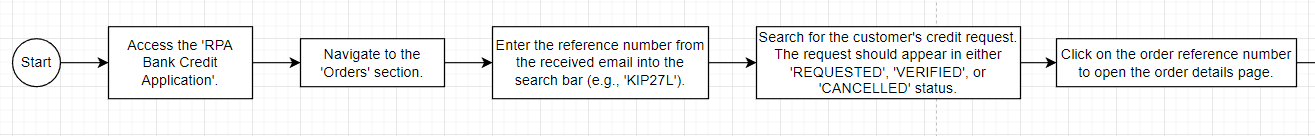

## 🎥📊📝Using Video Recording of the Process as Documentation


### **💡📉Content Caching: Enhancing Efficiency and Reducing Costs**

Content caching allows for continuous reference to the video without worrying about the processing costs. By caching the content, the system ensures that large video files are not repeatedly uploaded or processed, significantly speeding up the overall processing time. This is especially important when dealing with long business process videos.

In the case of production-level business process recordings, which can be up to **2 hours long**, caching plays a crucial role. It helps to maintain cost-effectiveness while optimizing the processing speed, enabling faster analysis and more efficient documentation generation. This approach is vital for organizations looking to streamline their workflows and reduce the overhead of processing lengthy and complex processes. https://ai.google.dev/gemini-api/docs/caching?lang=python

In [15]:
# Context Caching with Google Gemini - Using Ai to answer employees' questions during the on-boarding.

# Employee On-Boarding Agent System Instruction

str_systemPrompt = "Your role is to answer question regarding the business process presented on the video. Please be as specific, but try to provide brief one sentence answer."

# Context Caching with Google Gemini for the employee question during the on-boarding.

TTL_time_in_minutes = 60 # Increase this value if caching is required for a longer period of time.

# Create a cache with a TTL defined above
employeeQueryCache = caching.CachedContent.create(
    model='models/gemini-1.5-flash-002',
    display_name='E2E Process - Offer Acceptation - Caching for Employee Query', # used to identify the cache
    system_instruction=(str_systemPrompt),
    contents=[files[0]],
    ttl=datetime.timedelta(minutes=TTL_time_in_minutes)
)

In [16]:
#Sending queries to Gemini AI to simulate a new employee quering the video to get more inforation about the process.
#List of question that could be asked by a new employee during the on-boarding.

import time

# List of questions that could be asked by a new employee during the on-boarding.
queries = [
    {
        "question": "How can I find the credit request information based on the email acceptance?",
        "correct_answer": "In the RPA Bank web application you will go to the credit details screen, and enter the reference number found in the email into the search bar."
    },
    {
        "question": "What statuses can the credit request have?",
        "correct_answer": "The credit request can either be 'Requested', 'Verified', or 'Canceled'."
    },
    {
        "question": "What should I do if I can't find the credit request information?",
        "correct_answer": "If the request is not in the 'Requested' section, look for it in the 'Verified' section, then the 'Canceled' section. If there is nothing to reply to, it is a business exception."
    },
    {
        "question": "What should I change in the order details screen?",
        "correct_answer": "Tick the 'Offer Accepted' check box on the order details screen."
    },
    {
        "question": "What should I do if there's a connection error?",
        "correct_answer": "Press the refresh button."
    },
    {
        "question": "Where do I find the list of required documents for the credit product?",
        "correct_answer": "Go to the Credit Management System and input credentials. Then go to products, filter for the product ID and the required documents will be shown."
    },
    {
        "question": "Where should the list of required documents go?",
        "correct_answer": "It should go in the email or in a new version of the process, to the response section of the ticket in the RPA Credit Bank Application."
    },
    {
        "question": "What if there are duplicate required documents?",
        "correct_answer": "Only enter unique values."
    },
    {
        "question": "What if the client requests multiple products?",
        "correct_answer": "Check the required documents list for each product."
    },
    {
        "question": "What if the email acceptance is in a different format?",
        "correct_answer": "Search for the customer's name in the customers list, click on their order, and check for the latest request."
    }
]

# Sending queries to the Gemini AI
usage_metadata = {}

# Iterate through each query to make a call to the model with caching
for i, query in enumerate(queries):
    # Construct the GenerativeModel which uses the created cache (assuming cache is already available)
    model = genai.GenerativeModel.from_cached_content(cached_content=employeeQueryCache)

    # Record the start time
    start_time = time.time()

    # Query the model (assumes a method to handle a prompt and get a response)
    response = model.generate_content([(query["question"])])

    # Record the end time
    end_time = time.time()

    # Calculate the elapsed time
    elapsed_time = end_time - start_time

    # Store the usage metadata from the response
    usage_metadata = response.usage_metadata  # This is an object, not a dictionary

    # Accessing the attributes of the UsageMetadata object
    prompt_token_count = usage_metadata.prompt_token_count
    candidates_token_count = usage_metadata.candidates_token_count
    total_token_count = usage_metadata.total_token_count
    cached_content_token_count = usage_metadata.cached_content_token_count

    # Adding the extracted properties to the query
    query["ai_answer"] = response.text
    query["prompt_token_count"] = prompt_token_count
    query["candidates_token_count"] = candidates_token_count
    query["total_token_count"] = total_token_count
    query["cached_content_token_count"] = cached_content_token_count
    query["elapsed_time"] = round(elapsed_time, 2)  # Adding the elapsed time in double format

    # Print the result of the query
    print(f"Question #{i+1} ")
    print(query)


Question #1 
{'question': 'How can I find the credit request information based on the email acceptance?', 'correct_answer': 'In the RPA Bank web application you will go to the credit details screen, and enter the reference number found in the email into the search bar.', 'ai_answer': 'By using the reference number from the acceptance email, you can find the credit request in the RPA Bank Credit Application.', 'prompt_token_count': 35150, 'candidates_token_count': 23, 'total_token_count': 35173, 'cached_content_token_count': 35135, 'elapsed_time': 7.89}
Question #2 
{'question': 'What statuses can the credit request have?', 'correct_answer': "The credit request can either be 'Requested', 'Verified', or 'Canceled'.", 'ai_answer': 'The credit request can have the following statuses: REQUESTED, VERIFIED, and CANCELLED.', 'prompt_token_count': 35144, 'candidates_token_count': 19, 'total_token_count': 35163, 'cached_content_token_count': 35135, 'elapsed_time': 7.95}
Question #3 
{'question':

In [23]:
# Create DataFrame and filter out rows without ai_answer
df_aianswers = pd.DataFrame(queries)
df_aianswers = df_aianswers[df_aianswers['ai_answer'].notna()]

# Rename columns
df_aianswers = df_aianswers.rename(columns={
    'question': 'Question',
    'correct_answer': 'Correct Answer',
    'ai_answer': 'AI Answer',
    'prompt_token_count': 'Prompt Tokens',
    'candidates_token_count': 'Output Tokens',
    'total_token_count': 'Total Tokens',
    'cached_content_token_count': 'Cached Content Tokens',
    'elapsed_time': 'Query Time'
})

# Convert numeric columns to integers
numeric_columns = ['Prompt Tokens', 'Output Tokens', 'Total Tokens', 'Cached Content Tokens']
df_aianswers[numeric_columns] = df_aianswers[numeric_columns].astype(int)

# Format the elapsed time column to display in seconds with "sec" suffix
df_aianswers['Query Time'] = df_aianswers['Query Time'].apply(lambda x: f"{x:.1f} sec")

# Add new column for token calculation
df_aianswers['Paying for these tokens'] = df_aianswers['Output Tokens'] + (df_aianswers['Prompt Tokens'] - df_aianswers['Cached Content Tokens'])

# Set display options
pd.set_option('display.max_colwidth', None)

# Create styled DataFrame
styled_df = df_aianswers.style.set_properties(**{
    'text-align': 'left',
    'white-space': 'normal',
    'word-wrap': 'break-word'
}).set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'left')]},
    {'selector': 'td', 'props': [('text-align', 'left')]}
]).hide(axis="index")

# Display the styled DataFrame
styled_df

Question,Correct Answer,AI Answer,Prompt Tokens,Output Tokens,Total Tokens,Cached Content Tokens,Query Time,Paying for these tokens
How can I find the credit request information based on the email acceptance?,"In the RPA Bank web application you will go to the credit details screen, and enter the reference number found in the email into the search bar.","By using the reference number from the acceptance email, you can find the credit request in the RPA Bank Credit Application.",35150,23,35173,35135,7.9 sec,38
What statuses can the credit request have?,"The credit request can either be 'Requested', 'Verified', or 'Canceled'.","The credit request can have the following statuses: REQUESTED, VERIFIED, and CANCELLED.",35144,19,35163,35135,8.0 sec,28
What should I do if I can't find the credit request information?,"If the request is not in the 'Requested' section, look for it in the 'Verified' section, then the 'Canceled' section. If there is nothing to reply to, it is a business exception.","If you can't find the credit request information in the ""Requested"" section, check the ""Verified"" and then the ""Canceled"" sections.",35151,31,35182,35135,7.1 sec,47
What should I change in the order details screen?,Tick the 'Offer Accepted' check box on the order details screen.,"In the order details screen, you should change the status to ""Offer accepted"".",35146,16,35162,35135,8.3 sec,27
What should I do if there's a connection error?,Press the refresh button.,"If there is a connection error, you should press the refresh button.",35148,15,35163,35135,6.9 sec,28
Where do I find the list of required documents for the credit product?,"Go to the Credit Management System and input credentials. Then go to products, filter for the product ID and the required documents will be shown.",The list of required documents can be found by searching for the product ID in the RPA Bank Credit Application.,35150,21,35171,35135,24.4 sec,36
Where should the list of required documents go?,"It should go in the email or in a new version of the process, to the response section of the ticket in the RPA Credit Bank Application.","The list of required documents should go to the email or the ""Response"" section of the ticket in the RPA Credit Bank Application.",35145,27,35172,35135,7.2 sec,37
What if there are duplicate required documents?,Only enter unique values.,There is no mention of handling duplicate required documents in the video.,35144,13,35157,35135,6.8 sec,22
What if the client requests multiple products?,Check the required documents list for each product.,The process will be repeated for each product requested by the client.,35144,13,35157,35135,6.7 sec,22
What if the email acceptance is in a different format?,"Search for the customer's name in the customers list, click on their order, and check for the latest request.","If the email acceptance is in a different format, it should be considered a business exception.",35147,18,35165,35135,6.4 sec,30


## 📊Visualizing costs for queries with caching and without caching.

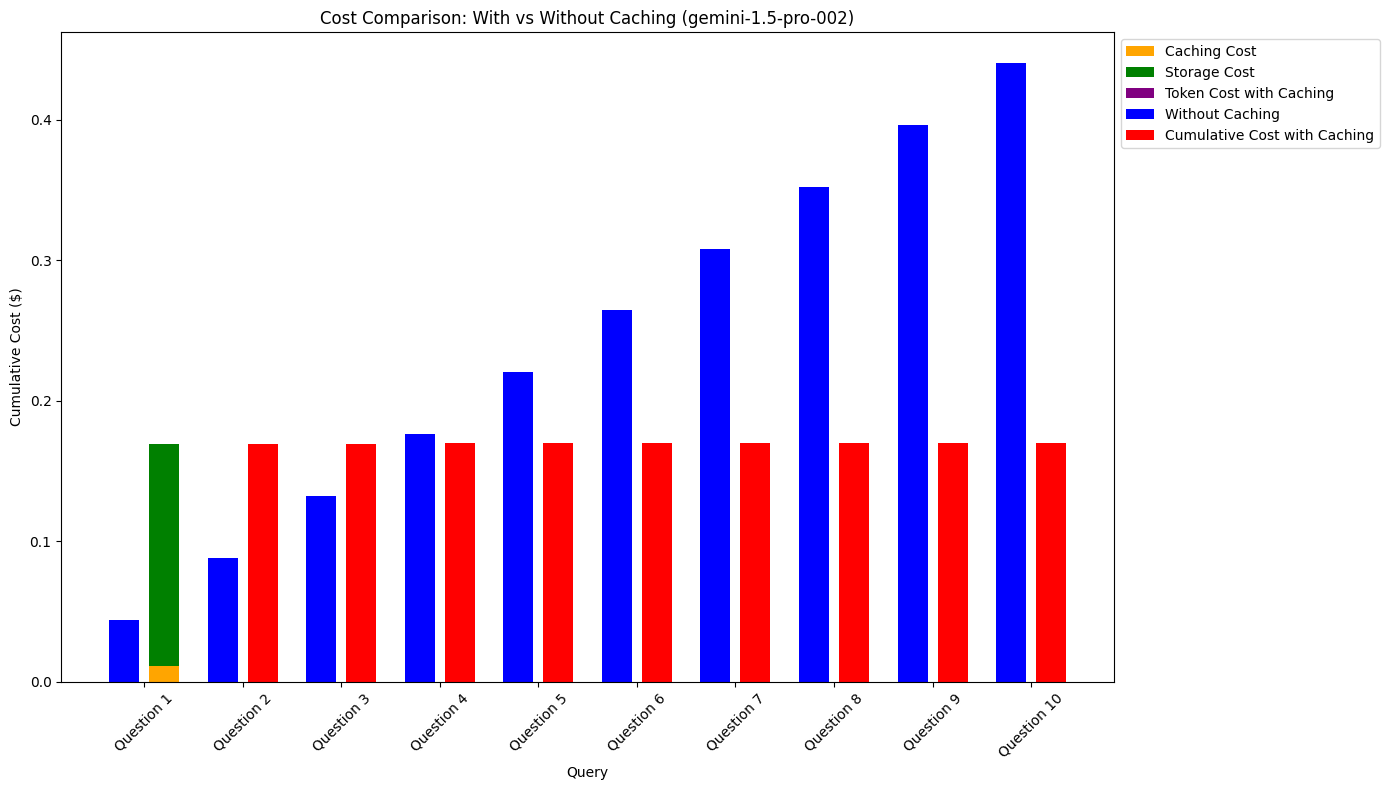

Question,Cost without Caching,Caching Cost,Storage Cost,Token Cost with Caching,Cumulative Cost with Caching
Question 1,0.044053,0.010980,0.158108,0.000134,0.169221
Question 2,0.088078,0.000000,0.000000,0.000106,0.169327
Question 3,0.132171,0.000000,0.000000,0.000175,0.169502
Question 4,0.176184,0.000000,0.000000,0.000094,0.169596
Question 5,0.220194,0.000000,0.000000,0.000091,0.169687
Question 6,0.264236,0.000000,0.000000,0.000124,0.169811
Question 7,0.308303,0.000000,0.000000,0.000148,0.169958
Question 8,0.352298,0.000000,0.000000,0.000076,0.170035
Question 9,0.396293,0.000000,0.000000,0.000076,0.170111
Question 10,0.440316,0.000000,0.000000,0.000105,0.170216


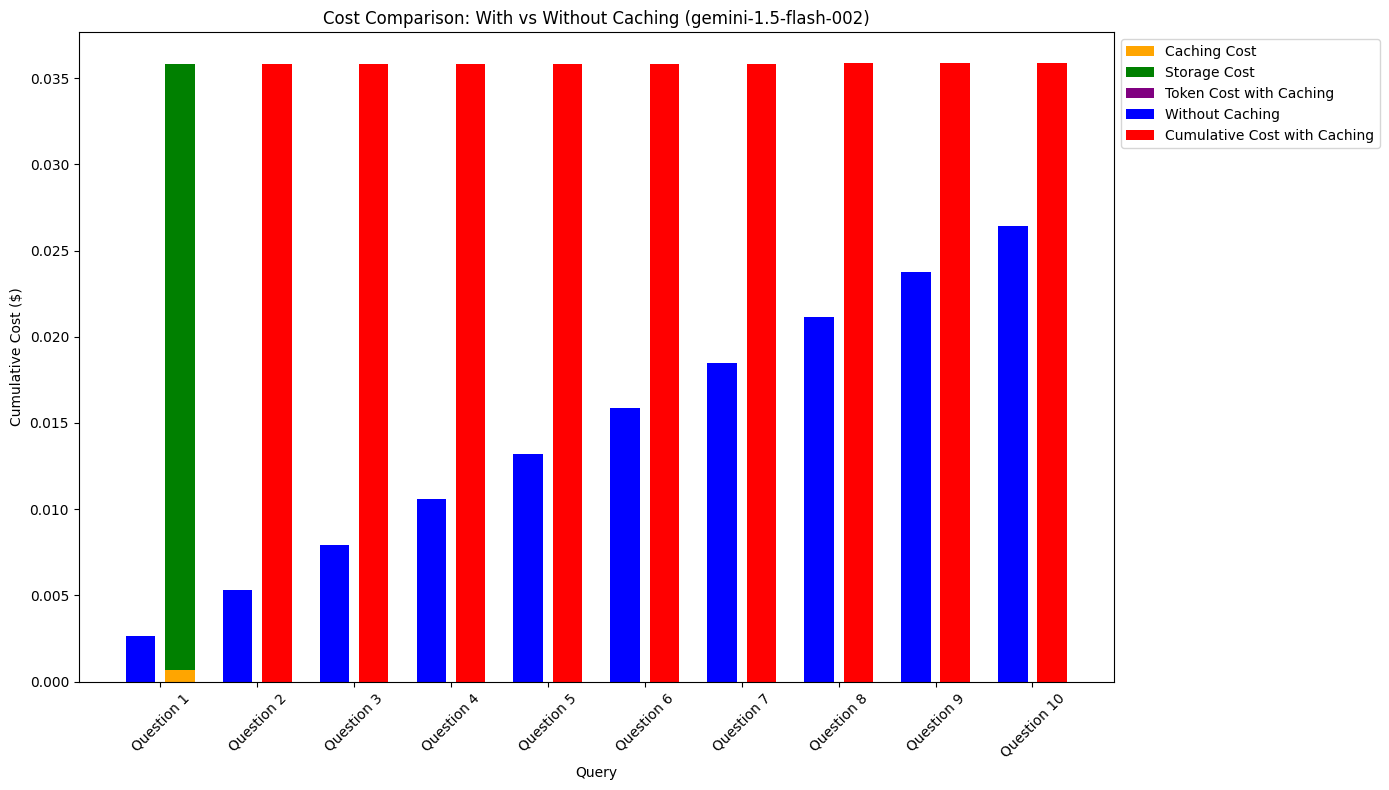

Question,Cost without Caching,Caching Cost,Storage Cost,Token Cost with Caching,Cumulative Cost with Caching
Question 1,0.002643,0.000659,0.035135,0.000008,0.035802
Question 2,0.005285,0.000000,0.000000,0.000006,0.035808
Question 3,0.007930,0.000000,0.000000,0.000011,0.035819
Question 4,0.010571,0.000000,0.000000,0.000006,0.035824
Question 5,0.013212,0.000000,0.000000,0.000005,0.035830
Question 6,0.015854,0.000000,0.000000,0.000007,0.035837
Question 7,0.018498,0.000000,0.000000,0.000009,0.035846
Question 8,0.021138,0.000000,0.000000,0.000005,0.035851
Question 9,0.023778,0.000000,0.000000,0.000005,0.035855
Question 10,0.026419,0.000000,0.000000,0.000006,0.035862


In [24]:
# This function allows to calculate costs and compare queries cost with caching and without caching.
def calculate_costs(model, prompt_token_count, candidates_token_count, total_token_count, cached_content_token_count, ttl_hours):
    pricing_models = {
        "gemini-1.5-pro-002": {
            "up_to_128k": {
                "input_price_per_million": 1.25,
                "output_price_per_million": 5.00,
                "context_caching_price_per_million": 0.3125,
                "storage_price_per_million_hours": 4.50
            },
            "over_128k": {
                "input_price_per_million": 2.50,
                "output_price_per_million": 10.00,
                "context_caching_price_per_million": 0.625,
                "storage_price_per_million_hours": 4.50
            }
        },
        "gemini-1.5-flash-002": {
            "up_to_128k": {
                "input_price_per_million": 0.075,
                "output_price_per_million": 0.30,
                "context_caching_price_per_million": 0.01875,
                "storage_price_per_million_hours": 1.00
            },
            "over_128k": {
                "input_price_per_million": 0.15,
                "output_price_per_million": 0.60,
                "context_caching_price_per_million": 0.0375,
                "storage_price_per_million_hours": 1.00
            }
        }
    }

    # Select pricing tier based on token count
    if prompt_token_count <= 128000:
        pricing = pricing_models[model]["up_to_128k"]
    else:
        pricing = pricing_models[model]["over_128k"]

    # Extract pricing details
    input_price_per_million = pricing["input_price_per_million"]
    output_price_per_million = pricing["output_price_per_million"]
    context_caching_price_per_million = pricing["context_caching_price_per_million"]
    storage_price_per_million_hours = pricing["storage_price_per_million_hours"]

    # Cached and non-cached tokens
    cached_tokens = cached_content_token_count
    non_cached_tokens = prompt_token_count - cached_tokens

    # Costs
    cached_input_cost = (cached_tokens / 1_000_000) * context_caching_price_per_million
    storage_cost = (cached_tokens * ttl_hours / 1_000_000) * storage_price_per_million_hours
    non_cached_input_cost = (non_cached_tokens / 1_000_000) * input_price_per_million
    cached_input_usage_cost = (cached_tokens / 1_000_000) * context_caching_price_per_million
    output_cost = (candidates_token_count / 1_000_000) * output_price_per_million

    # Total costs
    total_cost_with_caching = cached_input_cost + storage_cost + non_cached_input_cost + cached_input_usage_cost + output_cost
    total_input_cost_without_caching = (prompt_token_count / 1_000_000) * input_price_per_million
    total_cost_without_caching = total_input_cost_without_caching + output_cost

    # print(f'Input tokens: {output_cost:.10f} for {prompt_token_count} tokens')
    # print(f'Output tokens: {output_cost:.10f} for {candidates_token_count} tokens')
  
    # print(f'Input tokens with caching: {non_cached_input_cost:.10f} for {non_cached_tokens} tokens')
    # print(f'Output tokens with caching: {output_cost:.10f} for {candidates_token_count} tokens')


    return total_cost_with_caching, total_cost_without_caching, cached_input_cost, storage_cost, non_cached_input_cost + output_cost

# Calculating the cost of queries using caching

ttl_hours = TTL_time_in_minutes/60

def generateCostComparisonCharts(model, queries):
    # Data for table
    data = []
    cumulative_cost_with_caching = 0
    cumulative_cost_without_caching = 0

    for i, query in enumerate(queries, 1):
        with_cache, without_cache, caching_cost, storage_cost, token_cost_with_caching = calculate_costs(
            model=model,
            prompt_token_count=query["prompt_token_count"],
            candidates_token_count=query["candidates_token_count"],
            total_token_count=query["total_token_count"],
            cached_content_token_count=query["cached_content_token_count"],
            ttl_hours=ttl_hours,
        )
        # Caching and storage costs are only applied to the first query
        if i == 1:
            cumulative_cost_with_caching += (caching_cost + storage_cost + token_cost_with_caching)
        else:
            cumulative_cost_with_caching += (token_cost_with_caching)

        cumulative_cost_without_caching += without_cache

        data.append({
            "Question": f"Question {i}",
            "Cost without Caching": cumulative_cost_without_caching,
            "Caching Cost": caching_cost if i == 1 else 0,
            "Storage Cost": storage_cost if i == 1 else 0,
            "Token Cost with Caching": token_cost_with_caching,
            "Cumulative Cost with Caching": cumulative_cost_with_caching
        })

    # Create DataFrame
    df = pd.DataFrame(data)

    # Convert numeric columns to integers
    numeric_columns = ['Cost without Caching', 'Caching Cost', 'Storage Cost', 'Token Cost with Caching', 'Cumulative Cost with Caching']
    df[numeric_columns] = df[numeric_columns].astype(float)

    # Set display options
    pd.set_option('display.max_colwidth', None)

    # Create styled DataFrame
    styled_df = df.style.set_properties(**{
        'text-align': 'left',
        'white-space': 'normal',
        'word-wrap': 'break-word'
    }).set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'left')]},
        {'selector': 'td', 'props': [('text-align', 'left')]}
    ]).hide(axis="index")

    # Plotting
    plt.figure(figsize=(14, 8))
    bar_width = 0.35  # Thinner bars with adjusted width
    space_between_groups = 0.15
    positions = [i * (1 + space_between_groups) for i in range(len(df))]

    # Plot each bar for cumulative costs
    for i, row in df.iterrows():
        if i == 0:
            # For the first question, show Caching Cost, Storage Cost, and Token Cost with Caching
            plt.bar(positions[i] + bar_width / 1.5, row["Caching Cost"], width=bar_width, color="orange", label="Caching Cost")
            plt.bar(positions[i] + bar_width / 1.5, row["Storage Cost"], width=bar_width, color="green", bottom=row["Caching Cost"], label="Storage Cost")
            plt.bar(positions[i] + bar_width / 1.5, row["Token Cost with Caching"], width=bar_width, color="purple", bottom=row["Caching Cost"] + row["Storage Cost"], label="Token Cost with Caching")
        else:
            # For other questions, show only the Cumulative Cost with Caching
            plt.bar(positions[i] + bar_width / 1.5, row["Cumulative Cost with Caching"], width=bar_width, color="red", label="Cumulative Cost with Caching" if i == 1 else "")

        # Bar for cost without caching (shown for all queries)
        plt.bar(positions[i] - bar_width / 1.5, row["Cost without Caching"], width=bar_width, color="blue", label="Without Caching" if i == 0 else "")

    # Add labels and legend
    plt.xticks(positions, df["Question"], rotation=45)
    plt.ylabel("Cumulative Cost ($)")
    plt.xlabel("Query")
    plt.title(f"Cost Comparison: With vs Without Caching ({model})")
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()
    # Display the styled DataFrame
    display(styled_df)

# Display results
generateCostComparisonCharts("gemini-1.5-pro-002", queries)
generateCostComparisonCharts("gemini-1.5-flash-002", queries)


## 📝 Summary ##

As demonstrated in this notebook, Gemini AI is uniquely suited to:

- ✅ Generate valuable insights from videos and create high-quality process documentation.  
- ✅ Transform process video recordings into effective documentation that supports employees, for example during the onboarding process.  
- ✅ Leverage context caching to significantly reduce the cost of querying video data using AI.